# Aplicando Sliding Window

O desafio passado tem como imagens de teste prints de paginas web, acredito que em uma situação real, o problema seria abordado de maneira diferente, de forma que um algoritmo de scrapping seja responsável por salvar todas as imagens da pagina, para entao fazer a classificação. Como esse nao é o caso, precisamos usar um algoritmo para varrer a imagem e procurar os logos.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random
%matplotlib inline

In [2]:
def sliding_window(img, kernel_size):
    width = img.shape[1]-kernel_size
    height = img.shape[0]-kernel_size
    i=0
    imlist = []
    while i < height:
        j=0
        while j < width:
            imlist.append(img[i:i+kernel_size, j:j+kernel_size])
            j += int(kernel_size/2)
        i += int(kernel_size/2)
    print("Image slided, "+str(len(imlist))+" chunkies generated.")
    return np.array(imlist)

In [3]:
def onehot_to_label(onehot):
    classes = ['IPIRANGA', 'MAGAZINE', 'DOTZ', 'ORIGINAL', 'NENHUM']
    return classes[np.argmax(onehot)]    

In [4]:
def verify_logo(onehot):
    if np.argmax(onehot) == 4:
        return False
    return True

In [42]:
def run_model(data):
    with tf.Session() as sess:  
        print("Loading model...")
        saver = tf.train.import_meta_graph('./modelo.ckpt.meta')
        saver.restore(sess,tf.train.latest_checkpoint('./'))
        graph = tf.get_default_graph()
        x = graph.get_tensor_by_name("input:0")
        holdprob = graph.get_tensor_by_name("dropout_rate:0")
        feed={x:data, holdprob:1}
        op_to_restore = tf.nn.softmax(graph.get_tensor_by_name('fc8/Sigmoid:0'))
        print("Running Model...")
        result = sess.run(op_to_restore, feed_dict=feed)
        print("Success.")
    return result

In [43]:
def get_logo_chunkies(img_list, onehot):
    imgs = []
    classes = []
    for i in range(len(onehot)):
        if verify_logo(onehot[i]):
            imgs.append(img_list[i])
            classes.append(onehot_to_label(onehot[i]))
    print('detected '+str(len(imgs))+' chunks with logos, from classes '+str(classes))
    return imgs, classes

In [44]:
#### Fonte dessa func https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [45]:
def apply_full_proccess(img):
    slided = sliding_window(img, 100)
    results = run_model(slided)
    imgs, classes = get_logo_chunkies(slided, results)
    show_images(imgs, cols=4, titles=classes)

# Testando

Primeiramente carregaremos a imagem, em seguida, executaremos o modelo com sliding window nela, e serao plotados os logos detectados na imagem

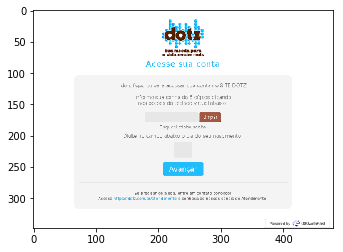

In [46]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_8.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]/2), int(test_img.shape[0]/2)))
plt.imshow(test_img)

Image slided, 40 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 2 chunks with logos, from classes ['DOTZ', 'DOTZ']


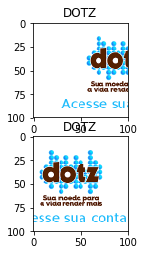

In [47]:
apply_full_proccess(test_img)

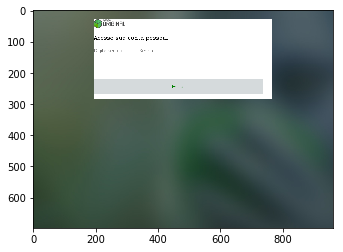

In [62]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_4.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]), int(test_img.shape[0])))
plt.imshow(test_img)

Image slided, 216 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 1 chunks with logos, from classes ['ORIGINAL']


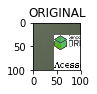

In [63]:
apply_full_proccess(test_img)

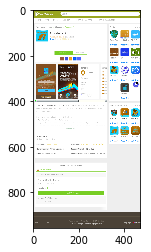

In [52]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_2.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]/2), int(test_img.shape[0]/2)))
plt.imshow(test_img)

Image slided, 144 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 4 chunks with logos, from classes ['IPIRANGA', 'IPIRANGA', 'IPIRANGA', 'IPIRANGA']


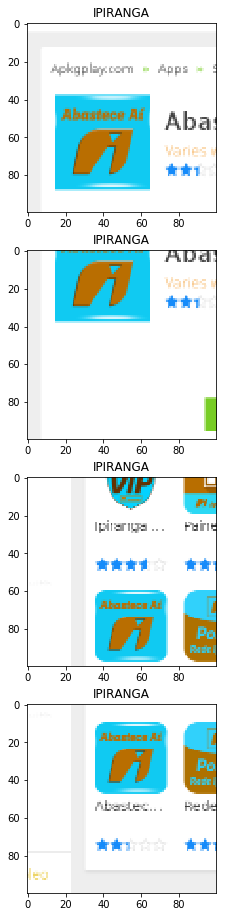

In [53]:
apply_full_proccess(test_img)

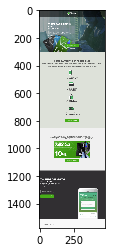

In [54]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_5.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]/2), int(test_img.shape[0]/2)))
plt.imshow(test_img)

Image slided, 240 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 5 chunks with logos, from classes ['ORIGINAL', 'ORIGINAL', 'ORIGINAL', 'ORIGINAL', 'ORIGINAL']


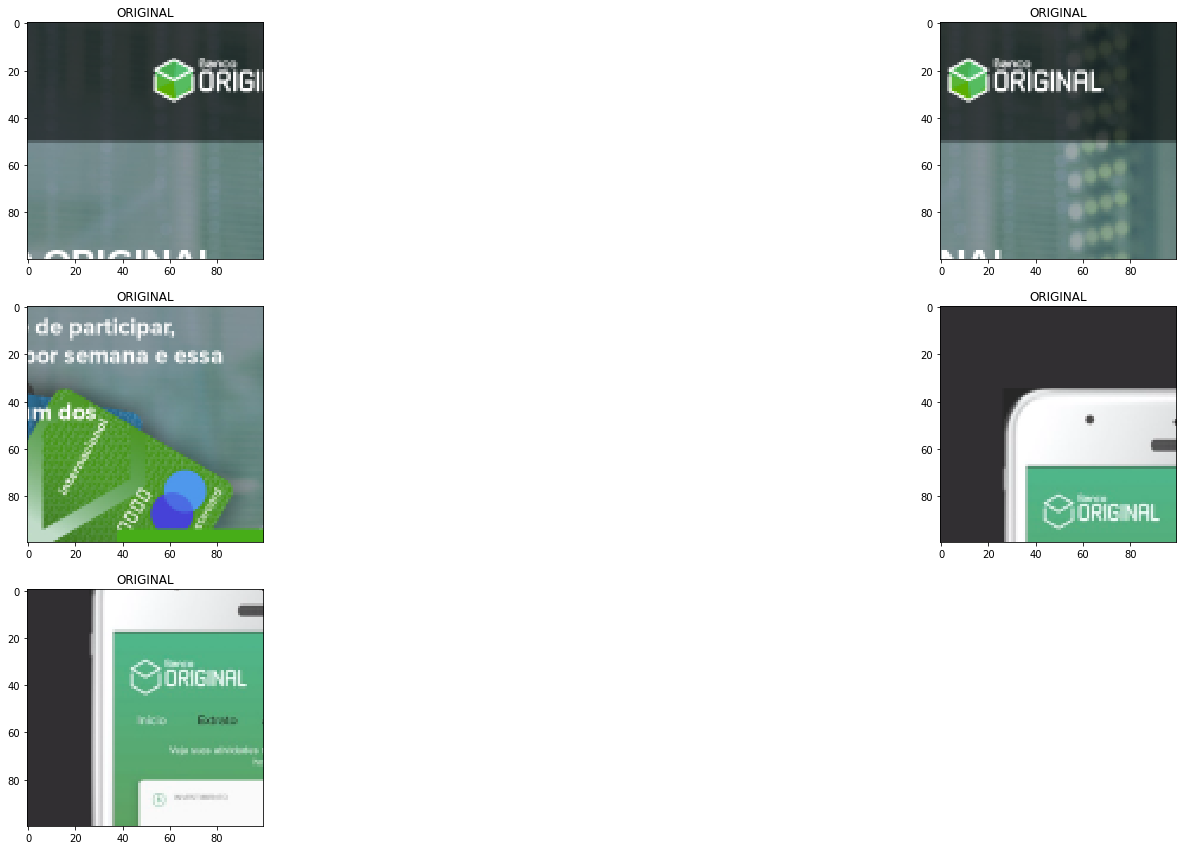

In [55]:
apply_full_proccess(test_img)

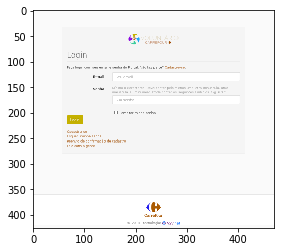

In [58]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_16.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]/2), int(test_img.shape[0]/2)))
plt.imshow(test_img)

In [59]:
apply_full_proccess(test_img)

Image slided, 56 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 0 chunks with logos, from classes []


<Figure size 0x0 with 0 Axes>

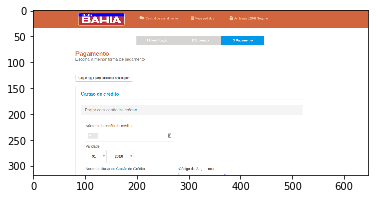

In [64]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_18.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]/2), int(test_img.shape[0]/2)))
plt.imshow(test_img)

In [65]:
apply_full_proccess(test_img)

Image slided, 55 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 0 chunks with logos, from classes []


<Figure size 0x0 with 0 Axes>

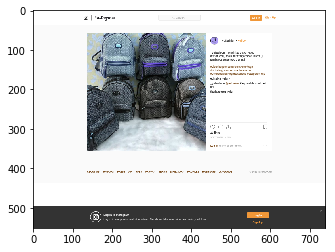

In [66]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_19.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]/2), int(test_img.shape[0]/2)))
plt.imshow(test_img)

In [67]:
apply_full_proccess(test_img)

Image slided, 130 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 0 chunks with logos, from classes []


<Figure size 0x0 with 0 Axes>

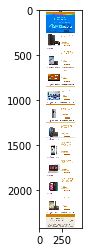

In [68]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_12.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]/2), int(test_img.shape[0]/2)))
plt.imshow(test_img)

In [69]:
apply_full_proccess(test_img)

Image slided, 376 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 43 chunks with logos, from classes ['MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE']


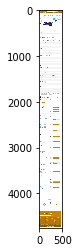

In [71]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_10.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]/2), int(test_img.shape[0]/2)))
plt.imshow(test_img)

In [72]:
apply_full_proccess(test_img)

Image slided, 846 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 41 chunks with logos, from classes ['MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'ORIGINAL', 'ORIGINAL', 'MAGAZINE', 'MAGAZINE', 'ORIGINAL', 'ORIGINAL', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE', 'MAGAZINE']


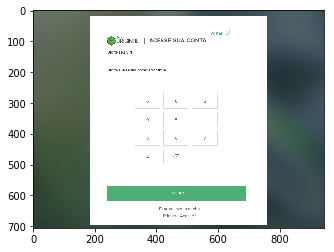

In [76]:
test_img = cv.imread("/home/miguel/Desktop/axurChallange/data/Samples/S_3.png")
test_img = cv.resize(test_img, (int(test_img.shape[1]), int(test_img.shape[0])))
plt.imshow(test_img)

Image slided, 221 chunkies generated.
Loading model...
INFO:tensorflow:Restoring parameters from ./modelo.ckpt
Running Model...
Success.
detected 1 chunks with logos, from classes ['ORIGINAL']


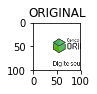

In [77]:
apply_full_proccess(test_img)

# Como melhorar a performance do método

Todo falso positivo apontado pela rede, pode ser salvo para aumentar o tamanho do dataset, e retreinar a rede. Outra medida abordada poderia ser substituir o modelo usado, talvez uma inception v4 traga um bom aumento na performance, porem necessitaria de mais tempo para realizara etapa de treino.